In [100]:
import pandas as pd
import numpy as np
import random
import math 
import time
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics, decomposition
from sklearn.model_selection import learning_curve, train_test_split

from sklearn.decomposition import FastICA, PCA
from sklearn.random_projection import SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.neural_network import MLPClassifier

print ('HELLO Assignment 3 - UL Dim Reduction')


HELLO Assignment 3 - UL Dim Reduction


In [99]:
sick = pd.read_csv("dataset_38_sick_cleanup.csv")
sick_nonan = sick.dropna()
X_pre = sick_nonan.loc[:,sick_nonan.columns != 'Class']
X = X_pre.to_numpy() # Features
y = (sick_nonan.Class).to_numpy() # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
random.seed(2020)
if (1):
    print (' --------  PART 1  CLUSTERING ----------')
    x = range(2, 16, 1)
    homogeneity_scores = np.zeros((len(x), 2))
    completeness_scores = np.zeros((len(x), 2))
    adjusted_rand_scores = np.zeros((len(x), 2))
    adjusted_mutual_info_scores = np.zeros((len(x), 2))
    silhouette_scores  = np.zeros((len(x), 2))

    distortion_scores = np.zeros(len(x))
    
    aic_scores = np.zeros(len(x))
    bic_scores = np.zeros(len(x))
    ll_scores = np.zeros(len(x))
    ll_scores2 = np.zeros(len(x))
    
    print ((x))
    index = 0
    for num in x: 
        print (num)
        model = KMeans(n_clusters=num, max_iter=500, init='k-means++')
        labels = model.fit_predict(X_train)
        homogeneity_scores[index,0] =  metrics.homogeneity_score(y_train, labels)
        completeness_scores[index,0] =  metrics.completeness_score(y_train, labels)
        adjusted_rand_scores[index,0] =  metrics.adjusted_rand_score(y_train, labels)
        adjusted_mutual_info_scores[index,0] =  metrics.adjusted_mutual_info_score(y_train, labels)
        silhouette_scores[index,0] =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
        labels2 = model.fit(X_train)
        distortion_scores[index] =  (labels2.inertia_)
        
        model = GMM(n_components=num, covariance_type = 'full')
        labels = model.fit_predict(X_train)
        homogeneity_scores[index,1] =  metrics.homogeneity_score(y_train, labels)
        completeness_scores[index,1] =  metrics.completeness_score(y_train, labels)
        adjusted_rand_scores[index,1] =  metrics.adjusted_rand_score(y_train, labels)
        adjusted_mutual_info_scores[index,1] =  metrics.adjusted_mutual_info_score(y_train, labels)
        silhouette_scores[index,1] =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))

        aic_scores[index] = model.aic(X_train)
        bic_scores[index] = model.bic(X_train)
        ll_scores[index] = model.score(X_train, y_train)
        ll_scores2[index] = model.score(X_train, labels)
        
        index = index + 1

 --------  PART 1  CLUSTERING ----------
range(2, 16)
2


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


3


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


4


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


5


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


6


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


7


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


8


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


10


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


11


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


12


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


13


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


14


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


15


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


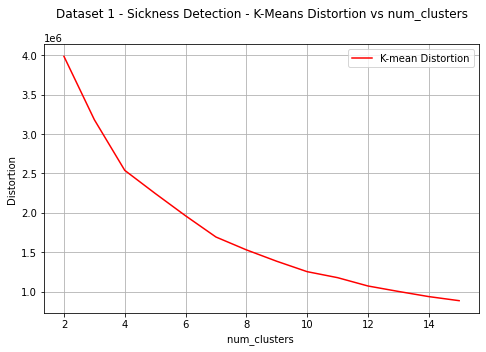

In [52]:
fig = plt.figure(figsize=(7,5))
plt.plot(x ,distortion_scores, label="K-mean Distortion", color='r')
plt.ylabel('Distortion')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-Means Distortion vs num_clusters', y=1.08)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-Means Distortion vs num_clusters.png')

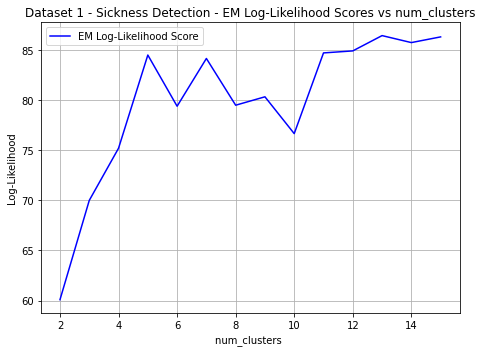

In [53]:
fig = plt.figure(figsize=(7,5))
plt.plot(x ,ll_scores, label="EM Log-Likelihood Score", color='b')
plt.ylabel('Log-Likelihood')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - EM Log-Likelihood Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - EM Log-Likelihood Scores vs num_clusters.png')

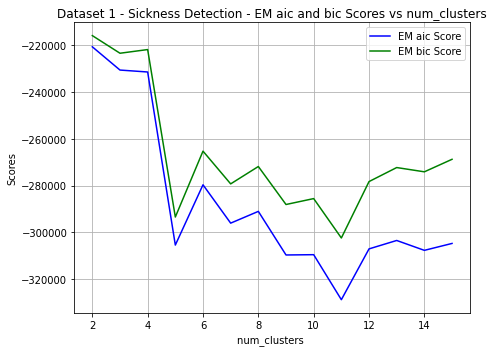

In [41]:
fig = plt.figure(figsize=(7,5))
plt.plot(x ,aic_scores, label="EM aic Score", color='b')
plt.plot(x ,bic_scores, label="EM bic Score", color='g')
plt.ylabel('Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - EM aic and bic Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - EM aic and bic Scores vs num_clusters.png')

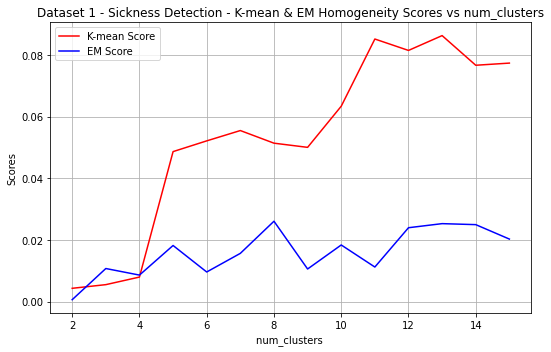

In [54]:
fig = plt.figure(figsize=(8,5))
plt.plot(x ,homogeneity_scores[:,0], label="K-mean Score", color='r')
plt.plot(x ,homogeneity_scores[:,1], label="EM Score", color='b')
plt.ylabel('Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-mean & EM Homogeneity Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-mean & EM Homogeneity Scores vs num_clusters.png')

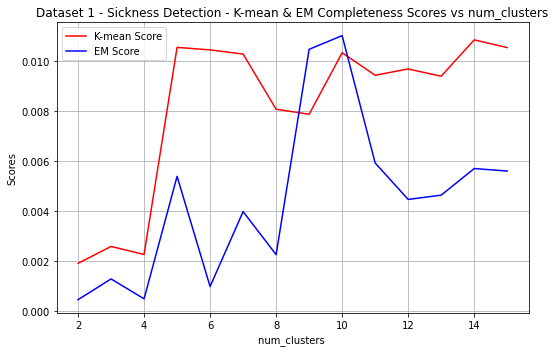

In [44]:
fig = plt.figure(figsize=(8,5))
plt.plot(x ,completeness_scores[:,0], label="K-mean Score", color='r')
plt.plot(x ,completeness_scores[:,1], label="EM Score", color='b')
plt.ylabel('Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-mean & EM Completeness Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-mean & EM Completeness Scores vs num_clusters.png')

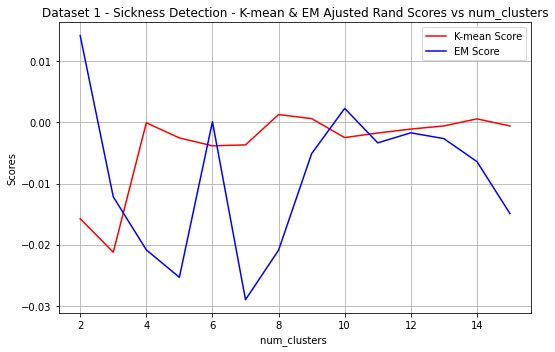

In [55]:
fig = plt.figure(figsize=(8,5))
plt.plot(x ,adjusted_rand_scores[:,0], label="K-mean Score", color='r')
plt.plot(x ,adjusted_rand_scores[:,1], label="EM Score", color='b')
plt.ylabel('Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-mean & EM Ajusted Rand Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-mean & EM Ajusted Rand Scores vs num_clusters.png')

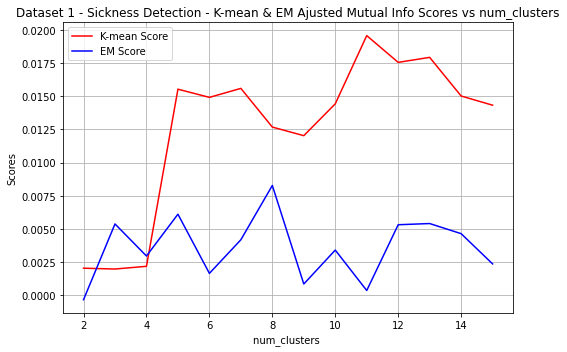

In [57]:
fig = plt.figure(figsize=(8,5))
plt.plot(x ,adjusted_mutual_info_scores[:,0], label="K-mean Score", color='r')
plt.plot(x ,adjusted_mutual_info_scores[:,1], label="EM Score", color='b')
plt.ylabel('Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-mean & EM Ajusted Mutual Info Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-mean & EM Ajusted Mutual Info Scores vs num_clusters.png')

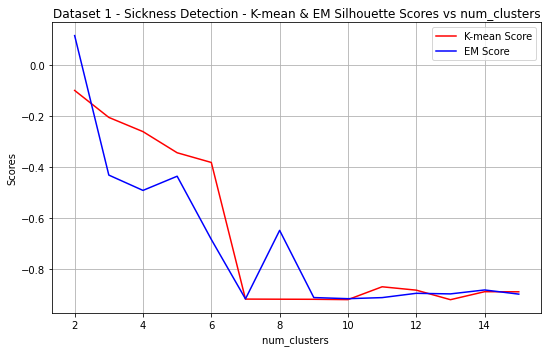

In [58]:
fig = plt.figure(figsize=(8,5))
plt.plot(x ,silhouette_scores[:,0], label="K-mean Score", color='r')
plt.plot(x ,silhouette_scores[:,1], label="EM Score", color='b')
plt.ylabel('Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-mean & EM Silhouette Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-mean & EM Silhouette Scores vs num_clusters.png')

In [60]:
# PART 2: DIMENSION REDUCTION
x = range(2, 16, 1)
index = 0
kmean_homoheneity = np.zeros((len(x), 4))
kmean_ami = np.zeros((len(x), 4))
kmean_silhouette = np.zeros((len(x), 4))
kmean_distortion = np.zeros((len(x), 4))
em_homoheneity = np.zeros((len(x), 4))
em_ami = np.zeros((len(x), 4))
em_silhouette = np.zeros((len(x), 4))
em_loglikelihood = np.zeros((len(x), 4))
for num in x:
    print (num)
    pca = PCA(n_components=num, random_state=0)
    pca_X_tr = pca.fit_transform(X_train)
    ica = FastICA(n_components=num, random_state=0)
    ica_X_tr = ica.fit_transform(X_train)
    rp = SparseRandomProjection(n_components=num, random_state=0, eps=None)
    rp_X_tr = rp.fit_transform(X_train)
    lda = LDA(n_components=None)
    lda_X_tr = lda.fit_transform(X_train, y_train)
    
    model_kmean = KMeans(n_clusters=num, max_iter=500, init='k-means++')
    
    labels = model.fit_predict(pca_X_tr)
    kmean_homoheneity[index,0] =  metrics.homogeneity_score(y_train, labels)
    kmean_ami[index,0]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    kmean_silhouette[index,0]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    labels2 = model_kmean.fit(pca_X_tr)
    kmean_distortion[index,0]  =  labels2.inertia_

    labels = model.fit_predict(ica_X_tr)
    kmean_homoheneity[index,1] =  metrics.homogeneity_score(y_train, labels)
    kmean_ami[index,1]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    kmean_silhouette[index,1]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    labels2 = model_kmean.fit(ica_X_tr)
    kmean_distortion[index,1]  =  labels2.inertia_
    
    labels = model.fit_predict(rp_X_tr)
    kmean_homoheneity[index,2] =  metrics.homogeneity_score(y_train, labels)
    kmean_ami[index,2]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    kmean_silhouette[index,2]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    labels2 = model_kmean.fit(rp_X_tr)
    kmean_distortion[index,2]  =  labels2.inertia_
    
    labels = model.fit_predict(lda_X_tr)
    kmean_homoheneity[index,3] =  metrics.homogeneity_score(y_train, labels)
    kmean_ami[index,3]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    kmean_silhouette[index,3]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    labels2 = model_kmean.fit(lda_X_tr)
    kmean_distortion[index,3]  =  labels2.inertia_
    
    
    
    
    model = GMM(n_components=num, covariance_type = 'full')
    
    labels = model.fit_predict(pca_X_tr)
    em_homoheneity[index,0] =  metrics.homogeneity_score(y_train, labels)
    em_ami[index,0]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    em_silhouette[index,0]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    em_loglikelihood[index,0]  =  model.score(pca_X_tr, labels) 

    labels = model.fit_predict(ica_X_tr)
    em_homoheneity[index,1] =  metrics.homogeneity_score(y_train, labels)
    em_ami[index,1]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    em_silhouette[index,1]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    em_loglikelihood[index,1]  = model.score(ica_X_tr, labels) 
    
    labels = model.fit_predict(rp_X_tr)
    em_homoheneity[index,2] =  metrics.homogeneity_score(y_train, labels)
    em_ami[index,2]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    em_silhouette[index,2]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    em_loglikelihood[index,2]  =  model.score(rp_X_tr, labels) 
    
    labels = model.fit_predict(lda_X_tr)
    em_homoheneity[index,3] =  metrics.homogeneity_score(y_train, labels)
    em_ami[index,3]         =  metrics.adjusted_mutual_info_score(y_train, labels)
    em_silhouette[index,3]  =  metrics.silhouette_score(y_train.reshape(-1, 1), labels.reshape(-1, 1))
    em_loglikelihood[index,3]  =  model.score(lda_X_tr, labels)    
    
    
    index = index + 1
    

2


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

3


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

4


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

5


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

6


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

7


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

8


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

9


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

10


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

11


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

12


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

13


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

14


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

15


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

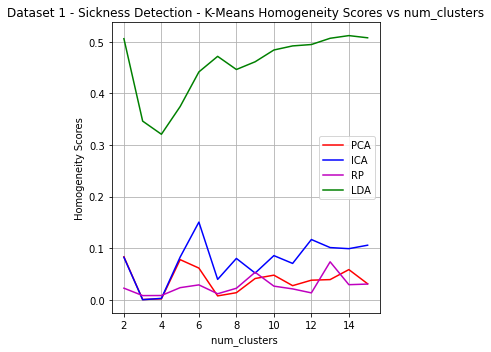

In [67]:
fig = plt.figure(figsize=(6,5))
plt.plot(x ,kmean_homoheneity[:,0], label="PCA", color='r')
plt.plot(x ,kmean_homoheneity[:,1], label="ICA", color='b')
plt.plot(x ,kmean_homoheneity[:,2], label="RP", color='m')
plt.plot(x ,kmean_homoheneity[:,3], label="LDA", color='g')
plt.ylabel('Homogeneity Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-Means Homogeneity Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-Means Homogeneity Scores vs num_clusters.png')

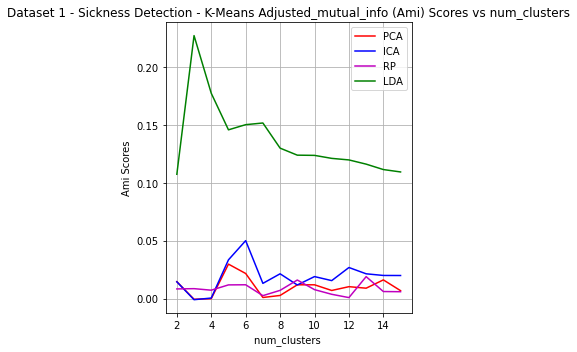

In [69]:
fig = plt.figure(figsize=(6.5,5))
plt.plot(x ,kmean_ami[:,0], label="PCA", color='r')
plt.plot(x ,kmean_ami[:,1], label="ICA", color='b')
plt.plot(x ,kmean_ami[:,2], label="RP", color='m')
plt.plot(x ,kmean_ami[:,3], label="LDA", color='g')
plt.ylabel('Ami Scores')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - K-Means Adjusted_mutual_info (Ami) Scores vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - K-Means Adjusted_mutual_info (Ami) Scores vs num_clusters.png')

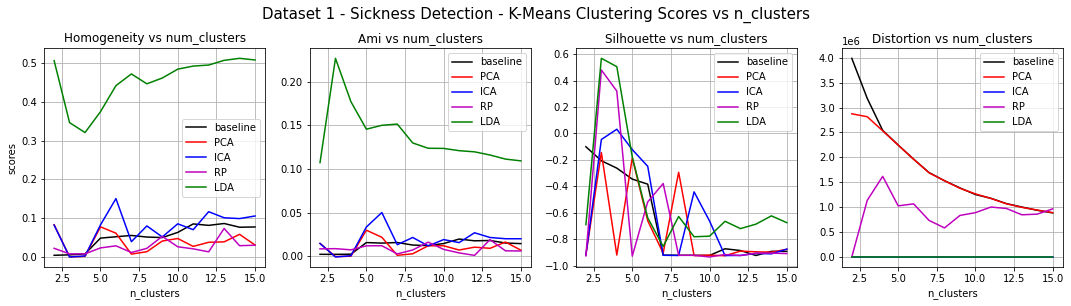

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15,4))
fig.suptitle('Dataset 1 - Sickness Detection - K-Means Clustering Scores vs n_clusters', y=1.05, size=15)
ax1.plot(x ,homogeneity_scores[:,0], label="baseline", color='k')
ax1.plot(x ,kmean_homoheneity[:,0], label="PCA", color='r')
ax1.plot(x ,kmean_homoheneity[:,1], label="ICA", color='b')
ax1.plot(x ,kmean_homoheneity[:,2], label="RP", color='m')
ax1.plot(x ,kmean_homoheneity[:,3], label="LDA", color='g')
ax1.grid()
ax1.set_title('Homogeneity vs num_clusters')
ax1.set(xlabel='n_clusters', ylabel='scores')
ax1.legend()

ax2.plot(x ,adjusted_mutual_info_scores[:,0], label="baseline", color='k')
ax2.plot(x ,kmean_ami[:,0], label="PCA", color='r')
ax2.plot(x ,kmean_ami[:,1], label="ICA", color='b')
ax2.plot(x ,kmean_ami[:,2], label="RP", color='m')
ax2.plot(x ,kmean_ami[:,3], label="LDA", color='g')
ax2.grid()
ax2.set_title('Ami vs num_clusters')
ax2.set(xlabel='n_clusters')
ax2.legend()

ax3.plot(x ,silhouette_scores[:,0], label="baseline", color='k')
ax3.plot(x ,kmean_silhouette[:,0], label="PCA", color='r')
ax3.plot(x ,kmean_silhouette[:,1], label="ICA", color='b')
ax3.plot(x ,kmean_silhouette[:,2], label="RP", color='m')
ax3.plot(x ,kmean_silhouette[:,3], label="LDA", color='g')
ax3.grid()
ax3.set_title('Silhouette vs num_clusters')
ax3.set(xlabel='n_clusters')
ax3.legend()

ax4.plot(x ,distortion_scores, label="baseline", color='k')
ax4.plot(x ,kmean_distortion[:,0], label="PCA", color='r')
ax4.plot(x ,kmean_distortion[:,1], label="ICA", color='b')
ax4.plot(x ,kmean_distortion[:,2], label="RP", color='m')
ax4.plot(x ,kmean_distortion[:,3], label="LDA", color='g')
ax4.grid()
ax4.set_title('Distortion vs num_clusters')
ax4.set(xlabel='n_clusters')
ax4.legend()

fig.tight_layout()
fig.savefig('Dataset 1 - Sickness Detection - K-Means Clustering Scores vs n_clusters.png')

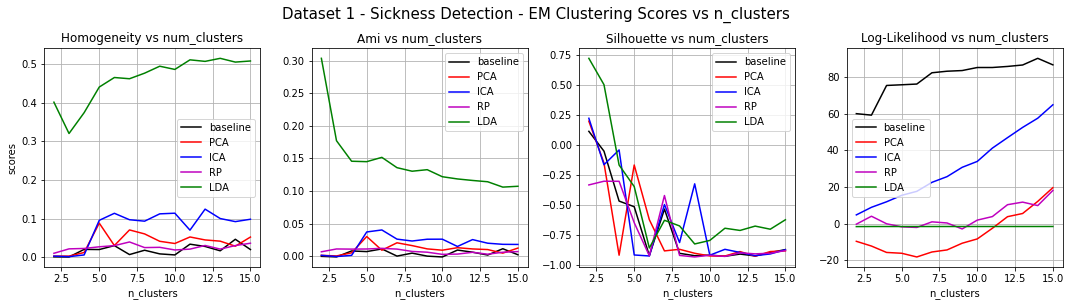

In [96]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15,4))
fig.suptitle('Dataset 1 - Sickness Detection - EM Clustering Scores vs n_clusters', y=1.05, size=15)
ax1.plot(x ,homogeneity_scores[:,1], label="baseline", color='k')
ax1.plot(x , em_homoheneity[:,0], label="PCA", color='r')
ax1.plot(x , em_homoheneity[:,1], label="ICA", color='b')
ax1.plot(x , em_homoheneity[:,2], label="RP", color='m')
ax1.plot(x , em_homoheneity[:,3], label="LDA", color='g')
ax1.grid()
ax1.set_title('Homogeneity vs num_clusters')
ax1.set(xlabel='n_clusters', ylabel='scores')
ax1.legend()

ax2.plot(x ,adjusted_mutual_info_scores[:,1], label="baseline", color='k')
ax2.plot(x ,em_ami[:,0], label="PCA", color='r')
ax2.plot(x ,em_ami[:,1], label="ICA", color='b')
ax2.plot(x ,em_ami[:,2], label="RP", color='m')
ax2.plot(x ,em_ami[:,3], label="LDA", color='g')
ax2.grid()
ax2.set_title('Ami vs num_clusters')
ax2.set(xlabel='n_clusters')
ax2.legend()

ax3.plot(x ,silhouette_scores[:,1], label="baseline", color='k')
ax3.plot(x ,em_silhouette[:,0], label="PCA", color='r')
ax3.plot(x ,em_silhouette[:,1], label="ICA", color='b')
ax3.plot(x ,em_silhouette[:,2], label="RP", color='m')
ax3.plot(x ,em_silhouette[:,3], label="LDA", color='g')
ax3.grid()
ax3.set_title('Silhouette vs num_clusters')
ax3.set(xlabel='n_clusters')
ax3.legend()

ax4.plot(x ,ll_scores2, label="baseline", color='k')
ax4.plot(x ,em_loglikelihood[:,0], label="PCA", color='r')
ax4.plot(x ,em_loglikelihood[:,1], label="ICA", color='b')
ax4.plot(x ,em_loglikelihood[:,2], label="RP", color='m')
ax4.plot(x ,em_loglikelihood[:,3], label="LDA", color='g')
ax4.grid()
ax4.set_title('Log-Likelihood vs num_clusters')
ax4.set(xlabel='n_clusters')
ax4.legend()

fig.tight_layout()
fig.savefig('Dataset 1 - Sickness Detection - EM Clustering Scores vs n_clusters.png')

In [103]:
# PART 3: NN w/ Dim 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
y_pred_baseline = y_pred
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9643243243243244


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [134]:
x = range(2, 16, 1)

acc = np.zeros((len(x),5))
runtime = np.zeros(5)

t0= time.clock()
index = 0
for num in x:
   
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    acc[index,0]= metrics.accuracy_score(y_train, y_pred)   
    index = index+1
t1 = time.clock() - t0
runtime[0] = t1/len(x)

t0= time.clock()
index = 0
for num in x:
    print (num)
    pca = PCA(n_components=num, random_state=0)
    pca_X_tr = pca.fit_transform(X_train)    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(pca_X_tr,y_train)
    y_pred = clf.predict(pca_X_tr)
    acc[index,1]= metrics.accuracy_score(y_train, y_pred)
    index = index+1
t1 = time.clock() - t0
runtime[1] = t1/len(x)

t0= time.clock()
index = 0
for num in x:    
    ica = FastICA(n_components=num, random_state=0)
    ica_X_tr = ica.fit_transform(X_train)     
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(ica_X_tr,y_train)
    y_pred = clf.predict(ica_X_tr)
    acc[index,2]= metrics.accuracy_score(y_train, y_pred)
    index = index+1
t1 = time.clock() - t0
runtime[2] = t1/len(x)

t0= time.clock()
index = 0
for num in x:    
    rp = SparseRandomProjection(n_components=num, random_state=0, eps=None)
    rp_X_tr = rp.fit_transform(X_train)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(rp_X_tr,y_train)
    y_pred = clf.predict(rp_X_tr)
    acc[index,3]= metrics.accuracy_score(y_train, y_pred)  
    index = index+1
t1 = time.clock() - t0
runtime[3] = t1/len(x)

t0= time.clock()    
index = 0
for num in x:
    lda = LDA(n_components=None)
    lda_X_tr = lda.fit_transform(X_train, y_train)    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(lda_X_tr,y_train)
    y_pred = clf.predict(lda_X_tr)
    acc[index,4]= metrics.accuracy_score(y_train, y_pred)
    index = index+1
t1 = time.clock() - t0
runtime[4] = t1/len(x)    


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

2
3


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4
5


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


6
7


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


8
9


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10
11


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


12
13


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


14
15


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 

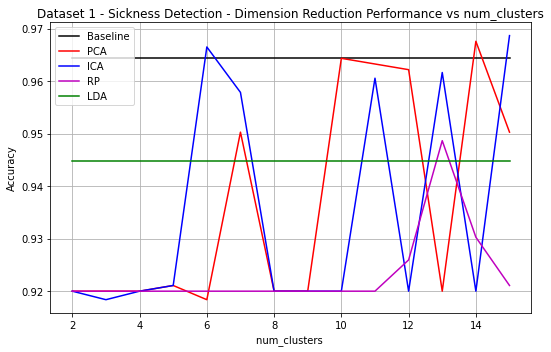

In [113]:
fig = plt.figure(figsize=(8,5))
plt.plot(x ,acc[:,0], label="Baseline", color='k')
plt.plot(x ,acc[:,1], label="PCA", color='r')
plt.plot(x ,acc[:,2], label="ICA", color='b')
plt.plot(x ,acc[:,3], label="RP", color='m')
plt.plot(x ,acc[:,4], label="LDA", color='g')

plt.ylabel('Accuracy')
plt.xlabel('num_clusters ')
plt.title('Dataset 1 - Sickness Detection - Dimension Reduction Performance vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset 1 - Sickness Detection - Dimension Reduction Performance vs num_clusters.png')

In [120]:
print (acc)

[[0.96432432 0.92       0.92       0.92       0.94486486]
 [0.96432432 0.92       0.91837838 0.92       0.94486486]
 [0.96432432 0.92       0.92       0.92       0.94486486]
 [0.96432432 0.92108108 0.92108108 0.92       0.94486486]
 [0.96432432 0.91837838 0.96648649 0.92       0.94486486]
 [0.96432432 0.95027027 0.95783784 0.92       0.94486486]
 [0.96432432 0.92       0.92       0.92       0.94486486]
 [0.96432432 0.92       0.92       0.92       0.94486486]
 [0.96432432 0.96432432 0.92       0.92       0.94486486]
 [0.96432432 0.96324324 0.96054054 0.92       0.94486486]
 [0.96432432 0.96216216 0.92       0.92594595 0.94486486]
 [0.96432432 0.92       0.96162162 0.94864865 0.94486486]
 [0.96432432 0.96756757 0.92       0.93027027 0.94486486]
 [0.96432432 0.95027027 0.96864865 0.92108108 0.94486486]]


In [121]:
index = 0
for num in x:
    print (num)
    lda = LDA(n_components=None)
    lda_X_tr = lda.fit_transform(X_train, y_train)    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(lda_X_tr,y_train)
    y_pred = clf.predict(lda_X_tr)
    acc[index,4]= metrics.accuracy_score(y_train, y_pred)
    index = index+1
    print (lda_X_tr.shape)

2
(1850, 1)
3
(1850, 1)
4
(1850, 1)
5
(1850, 1)
6
(1850, 1)
7
(1850, 1)
8
(1850, 1)
9
(1850, 1)
10
(1850, 1)
11
(1850, 1)
12
(1850, 1)
13
(1850, 1)
14
(1850, 1)
15
(1850, 1)


96.4


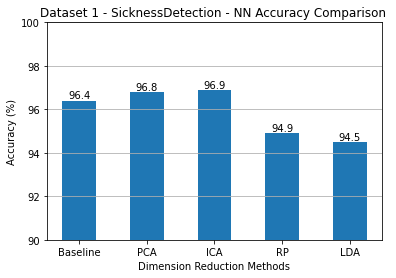

In [138]:
print (round(100*max(acc[:,0]),1))
x=['Baseline', 'PCA', 'ICA', 'RP', 'LDA',]
y=[round(100*max(acc[:,0]),1), round(100*max(acc[:,1]),1), round(100*max(acc[:,2]),1), round(100*max(acc[:,3]),1), round(100*max(acc[:,4]),1)]
#print (y)
fig, ax = plt.subplots()
ax.bar(x, y, width = 0.5)
ax.set_ylim([90,100])
plt.ylabel('Accuracy (%)')
plt.xlabel('Dimension Reduction Methods')
ax.set_xticklabels(x)
ax.yaxis.grid()
plt.title('Dataset 1 - SicknessDetection - NN Accuracy Comparison ')
for i in range(len(y)):#
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')

[0.09, 1.33, 0.67, 0.05, 0.98]


Text(0.5, 1.0, 'Dataset 1 - SicknessDetection - NN Runtime (seconds) Comparison ')

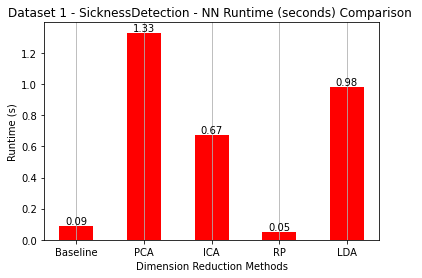

In [139]:
x=['Baseline', 'PCA', 'ICA', 'RP', 'LDA',]
y = [round(runtime[0],2), round(runtime[1],2), round(runtime[2],2), round(runtime[3],2), round(runtime[4],2)]
print (y)
fig, ax = plt.subplots()
ax.bar(x, y, width = 0.5, color='r')
plt.ylabel('Runtime (s)')
plt.xlabel('Dimension Reduction Methods')
ax.set_xticklabels(x)
#ax.set_ylim([0,4000])
for i in range(len(y)):#
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
plt.grid()
ax.yaxis.grid()
plt.title('Dataset 1 - SicknessDetection - NN Runtime (seconds) Comparison ')

In [177]:
# Part 4: NN with Clustering
# A: Cluster Only
# A: k-mean cluster

model = KMeans(n_clusters=10, max_iter=500, init='k-means++')
labels = model.fit_predict(X_train)
labels = labels.reshape(-1, 1)
print (labels.shape)
print (labels[0:10])

print (X_train.shape)
X_train_new = np.append(X_train,labels, axis=1)
print (X_train_new.shape)
print (X_train_new[0:5])
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
clf = MLPClassifier()
#clf.fit(labels.reshape(-1, 1),y_train)
clf.fit(X_train_new,y_train)
y_pred = clf.predict(X_train_new)
print (sum(y_pred))
accuracy = metrics.accuracy_score(y_train, y_pred)
print (accuracy)

(1850, 1)
[[3]
 [7]
 [1]
 [7]
 [3]
 [1]
 [6]
 [7]
 [8]
 [7]]
(1850, 28)
(1850, 29)
[[ 38.     1.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     1.     1.     2.5    1.     2.3
    1.    90.     1.     0.91   1.    99.     0.     2.     3.  ]
 [ 59.     1.     1.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.3    1.     1.9
    1.   144.     1.     0.93   1.   156.     0.     5.     7.  ]
 [ 60.     1.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     2.1    1.     1.4
    1.    89.     1.     0.99   1.    90.     0.     5.     1.  ]
 [ 57.     1.     1.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.2    1.     1.6
    1.   141.     1.     0.89   1.   158.     0.     5.     7.  ]
 [ 45.     2.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0

In [180]:
x = range(2, 16, 1)

acc_only = np.zeros((len(x),2))
runtime_only = np.zeros((len(x),2))

index = 0
for num in x:
    t0= time.clock()
    print (num)
    model = KMeans(n_clusters=num, max_iter=500, init='k-means++')
    labels = model.fit_predict(X_train)
    labels = labels.reshape(-1, 1)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf = MLPClassifier()
    clf.fit(labels,y_train) 
    y_pred = clf.predict(labels)
    print (metrics.accuracy_score(y_train, y_pred))
    acc_only[index, 0] = metrics.accuracy_score(y_train, y_pred)    
    runtime_only[index, 0] = time.clock() - t0
    index = index+1
    
    
index = 0
for num in x:
    t0= time.clock()
    print (num)
    model = GMM(n_components=num, covariance_type = 'full')
    labels = model.fit_predict(X_train)
    labels = labels.reshape(-1, 1)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf.fit(labels.reshape(-1, 1),y_train) 
    y_pred = clf.predict(labels)
    acc_only[index, 1] = metrics.accuracy_score(y_train, y_pred)    
    runtime_only[index, 1] = time.clock() - t0    
    index = index+1
    

/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


2
0.92
3


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
4


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
5


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
6


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
7


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
8


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
9


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
10


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
11


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
12


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
13


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
14


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
15


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.92
2
3
4
5


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages

6
7


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


8


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


9
10


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


11
12


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


13


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


14


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


15


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


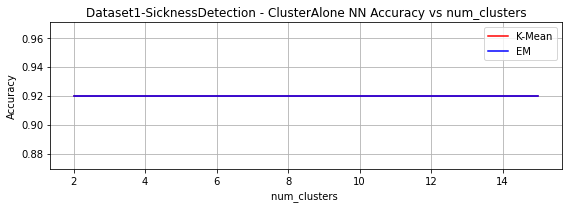

In [182]:
fig = plt.figure(figsize=(8,3))
plt.plot(x ,acc_only[:,0], label="K-Mean", color='r')
plt.plot(x ,acc_only[:,1], label="EM", color='b')
plt.ylabel('Accuracy')
plt.xlabel('num_clusters ')
plt.title('Dataset1-SicknessDetection - ClusterAlone NN Accuracy vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset1-SicknessDetection - ClusterAlone NN Accuracy vs num_clusters.png')

In [155]:
print (acc_only)

[[0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]
 [0.92 0.92]]


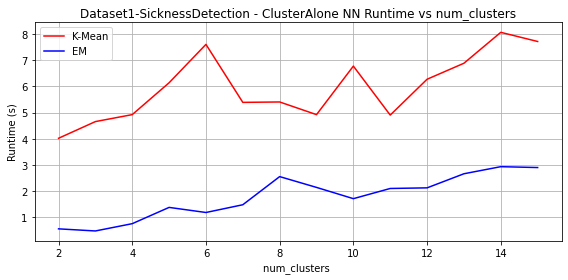

In [181]:
fig = plt.figure(figsize=(8,4))
plt.plot(x ,runtime_only[:,0], label="K-Mean", color='r')
plt.plot(x , runtime_only[:,1], label="EM", color='b')
plt.ylabel('Runtime (s)')
plt.xlabel('num_clusters ')
plt.title('Dataset1-SicknessDetection - ClusterAlone NN Runtime vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset1-SicknessDetection - ClusterAlone NN Runtime vs num_clusters.png')

In [183]:
x = range(2, 16, 1)

acc_only = np.zeros((len(x),2))
runtime_only = np.zeros((len(x),2))

index = 0
for num in x:
    t0= time.clock()
    print (num)
    model = KMeans(n_clusters=num, max_iter=500, init='k-means++')
    labels = model.fit_predict(X_train)
    labels = labels.reshape(-1, 1)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf = MLPClassifier()
    X_train_new = np.append(X_train,labels, axis=1)
    clf.fit(X_train_new,y_train) 
    y_pred = clf.predict(X_train_new)
    print (metrics.accuracy_score(y_train, y_pred))
    acc_only[index, 0] = metrics.accuracy_score(y_train, y_pred)    
    runtime_only[index, 0] = time.clock() - t0
    index = index+1
    
    
index = 0
for num in x:
    t0= time.clock()
    print (num)
    model = GMM(n_components=num, covariance_type = 'full')
    labels = model.fit_predict(X_train)
    labels = labels.reshape(-1, 1)
    X_train_new = np.append(X_train,labels, axis=1)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
    clf = MLPClassifier()
    clf.fit(X_train_new,y_train) 
    y_pred = clf.predict(X_train_new)
    acc_only[index, 1] = metrics.accuracy_score(y_train, y_pred)    
    runtime_only[index, 1] = time.clock() - t0    
    index = index+1

/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


2


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9643243243243244
3
0.9621621621621622
4


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/mini

0.9702702702702702
5
0.965945945945946
6


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9448648648648649
7


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.952972972972973
8


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9556756756756757
9


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9708108108108108
10


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9551351351351351
11


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9697297297297297
12


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9497297297297297
13


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/mini

0.9643243243243244
14
0.9697297297297297
15


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.9675675675675676
2


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


3


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


4


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


5


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


6


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


7


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


8


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


9


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


10


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


11


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


12


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


13


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


14


/Users/officework/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


15


/Users/officework/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


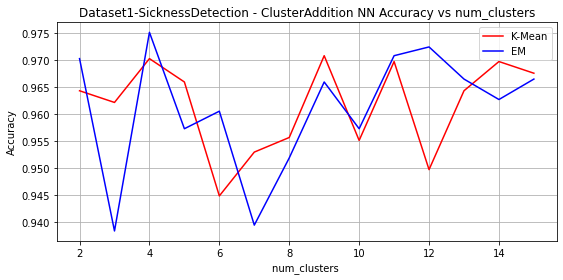

In [184]:
fig = plt.figure(figsize=(8,4))
plt.plot(x ,acc_only[:,0], label="K-Mean", color='r')
plt.plot(x ,acc_only[:,1], label="EM", color='b')
plt.ylabel('Accuracy')
plt.xlabel('num_clusters ')
plt.title('Dataset1-SicknessDetection - ClusterAddition NN Accuracy vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset1-SicknessDetection - ClusterAddition NN Accuracy vs num_clusters.png')

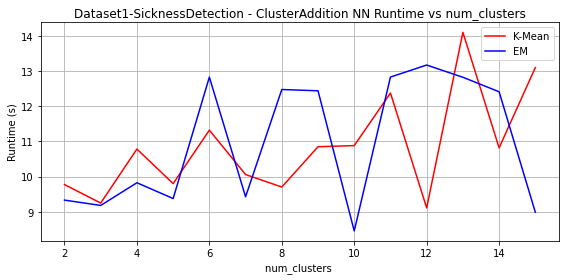

In [185]:
fig = plt.figure(figsize=(8,4))
plt.plot(x ,runtime_only[:,0], label="K-Mean", color='r')
plt.plot(x , runtime_only[:,1], label="EM", color='b')
plt.ylabel('Runtime (s)')
plt.xlabel('num_clusters ')
plt.title('Dataset1-SicknessDetection - ClusterAddition NN Runtime vs num_clusters', y=1)
plt.grid()
plt.legend()
#plt.ylim(0, 5e-6)
fig.tight_layout()
plt.show()
fig.savefig('Dataset1-SicknessDetection - ClusterAddition NN Runtime vs num_clusters.png')